In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from torch import nn, optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch

df = pd.read_csv('UpdatedMatches.csv')
data = []

C:\Users\herath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

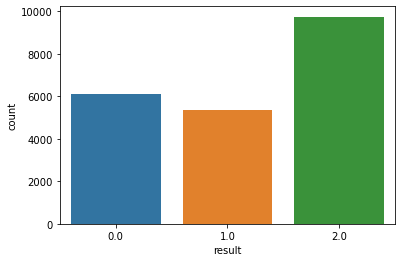

In [2]:
df['season'].replace({'2008/2009':2008, '2009/2010':2009, '2010/2011':2010, '2011/2012':2011, '2012/2013':2012, '2013/2014':2013, '2014/2015':2014, '2015/2016':2015 },inplace=True)

df["result"] = np.nan
for index, row in df.iterrows():
    if df.loc[index,'home_team_goal'] == df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 1
    if df.loc[index,'home_team_goal'] > df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 2
    if df.loc[index,'home_team_goal'] < df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 0
        
sns.countplot(df.result)

In [3]:
df.result.value_counts()/df.shape[0]

2.0    0.459098
0.0    0.288525
1.0    0.252377
Name: result, dtype: float64

In [4]:
from tqdm import tqdm

def teamfunction( df ):
    for index, row in tqdm(df.iterrows()):
        
        home_team = []
        home_team.append(df.loc[index,'buildUpPlaySpeed_home_team'])
        home_team.append(df.loc[index,'buildUpPlayDribbling_home_team'])
        home_team.append(df.loc[index,'buildUpPlayPassing_home_team'])
        home_team.append(df.loc[index,'chanceCreationPassing_home_team'])
        home_team.append(df.loc[index,'chanceCreationCrossing_home_team'])
        home_team.append(df.loc[index,'chanceCreationShooting_home_team'])
        home_team.append(df.loc[index,'defencePressure_home_team'])
        home_team.append(df.loc[index,'defenceAggression_home_team'])
        home_team.append(df.loc[index,'defenceTeamWidth_home_team'])


        away_team = []
        away_team.append(df.loc[index,'buildUpPlaySpeed_away_team'])
        away_team.append(df.loc[index,'buildUpPlayDribbling_away_team'])
        away_team.append(df.loc[index,'buildUpPlayPassing_away_team'])
        away_team.append(df.loc[index,'chanceCreationPassing_away_team'])
        away_team.append(df.loc[index,'chanceCreationCrossing_away_team'])
        away_team.append(df.loc[index,'chanceCreationShooting_away_team'])
        away_team.append(df.loc[index,'defencePressure_away_team'])
        away_team.append(df.loc[index,'defenceAggression_away_team'])
        away_team.append(df.loc[index,'defenceTeamWidth_away_team'])


        team_matrix = []
        for i in range(9):          
            m =[]
            for j in range(9):
                m.append(home_team[i]-away_team[j])
            team_matrix.append(m)

        team_details.append(team_matrix)


In [5]:
X = df.drop(['result','date', 'home_team_goal','away_team_goal'], axis=1)
y = df[['result']]
RANDOM_SEED =42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [6]:
y_train.result.value_counts()/y_train.shape[0]

2.0    0.458637
0.0    0.290715
1.0    0.250647
Name: result, dtype: float64

In [7]:
y_train.result.value_counts()

2.0    7795
0.0    4941
1.0    4260
Name: result, dtype: int64

In [8]:
team_details = []
teamfunction( X_train )
team_train_data = team_details
Team_Train = torch.Tensor(np.array(team_train_data))

16996it [00:21, 775.07it/s]


In [9]:
Team_Train.size()

torch.Size([16996, 9, 9])

In [10]:
Team_Train.type()

'torch.FloatTensor'

In [11]:
team_details = []
teamfunction( X_test )
team_test_data = team_details
Team_Test = torch.Tensor(np.array(team_test_data))

4250it [00:07, 536.98it/s]


In [12]:
Team_Test.size()

torch.Size([4250, 9, 9])

In [13]:
Team_Test.type()

'torch.FloatTensor'

In [14]:
y_train = torch.squeeze(torch.LongTensor(np.array(y_train)))
y_train.size()

torch.Size([16996])

In [15]:
y_test = torch.squeeze(torch.LongTensor(np.array(y_test)))

In [16]:
y_test.size()

torch.Size([4250])

In [17]:
Team_Train = Team_Train.unsqueeze(1)
Team_Train.size()

Team_Test = Team_Test.unsqueeze(1)
Team_Test.size()

torch.Size([4250, 1, 9, 9])

In [23]:
import torch.utils.data as data_utils

train = data_utils.TensorDataset(Team_Train, y_train)
train_loader = data_utils.DataLoader(train, batch_size=128, shuffle=True)

test = data_utils.TensorDataset(Team_Test, y_test)
test_loader = data_utils.DataLoader(test, batch_size=128, shuffle=True)

In [24]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

class Network(nn.Module):

    def __init__(self):
        super(Network, self).__init__()
        # Convolutional Neural Network Layer 
        self.convolutaional_neural_network_layers = nn.Sequential(
                # Here we are defining our 2D convolutional layers
                # We can calculate the output size of each convolutional layer using the following formular
                # outputOfEachConvLayer = [(in_channel + 2*padding - kernel_size) / stride] + 1
                # We have in_channels=19 because our input is a 19 layer #D matrix
                nn.Conv2d(in_channels=1, out_channels=4, kernel_size=1, stride=1), # (N, 19, 11, 11) 
                nn.ReLU(),
                nn.BatchNorm2d(4), 
                # After the first convolutional layer the output of this layer is:
                # [(9 + 2*0 - 1)/1] + 1 = 9.  
          
                # output of our second conv layer
                nn.Conv2d(in_channels=4, out_channels=16, kernel_size=1, stride=1),
                nn.ReLU(),
                nn.BatchNorm2d(16),
                # After the second convolutional layer the output of this layer is:
                # [(9 + 2*0 - 1)/1] + 1 = 9.
                
                # output of our third conv layer
                nn.Conv2d(in_channels=16, out_channels=64, kernel_size=1, stride=1),
                nn.ReLU(),
                nn.BatchNorm2d(64),
                # After the second convolutional layer the output of this layer is:
                # [(9 + 2*0 - 1)/1] + 1 = 9.
            
                #Average pooling layer
                nn.AvgPool2d(9, stride=1) 
                #(N, 64, 11, 11) --> (N, 64, 1, 1)
            
        )

        # Linear layer
        self.linear_layers = nn.Sequential(
                # We have the output_channel=64 of our second conv layer
                nn.Linear(in_features=64, out_features=64),          
                nn.ReLU(),
                #apply dropout 0.2 
                nn.Dropout(p=0.2),
                nn.Linear(in_features=64, out_features=64),          
                nn.ReLU(),
                nn.Linear(in_features=64, out_features=64),          
                nn.ReLU(),
                nn.Linear(in_features=64, out_features=3)
        )

    # Defining the forward pass 
    def forward(self, x):
        x = self.convolutaional_neural_network_layers(x)
        # After we get the output of our convolutional layer we must flatten it or rearrange the output into a vector
        x = x.view(x.size(0), -1)
        # Then pass it through the linear layer
        x = self.linear_layers(x)
        return x

In [25]:
#Doing it on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = Network()
model.to(device)

Team_Train = Team_Train.to(device)
Team_Test = Team_Test.to(device)

y_train = y_train.to(device)
y_test = y_test.to(device)

In [26]:
optimizer = optim.SGD(model.parameters(), lr=0.001)
weights = [1/4941, 1/4260, 1/7795 ]
class_weights = torch.FloatTensor(weights)
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [27]:
from sklearn.metrics import f1_score

epochs = 250
train_loss, val_loss = [], []
accuracy_total_train, accuracy_total_val = [], []
train_f1_scores, test_f1_scores = [], []

for epoch in range(epochs):
   
    total_train_loss = 0
    total_val_loss = 0
    prediction_list_test = []
    prediction_list_train = []
    train_f1score = 0
    test_f1score = 0

    model.train()
    
    total = 0
    # training our model
    for idx, (x, y) in enumerate(train_loader):

        optimizer.zero_grad()
        pred = model(x)
        loss = criterion(pred, y)
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1
            y_prediction = torch.max(p.data, 0)[1]
            prediction_list_train.append(y_prediction)
                
    accuracy_train = total / len(Team_Train)
    accuracy_total_train.append(accuracy_train)

    total_train_loss = total_train_loss / (idx + 1)
    train_loss.append(total_train_loss)
    
    prediction_stacked_tensor = torch.stack(prediction_list_train)
    train_f1score = f1_score(y_train, prediction_stacked_tensor, average='weighted')
    train_f1_scores.append(train_f1score)
    
    # validating our model
    model.eval()
    total = 0
    for idx, (x, y) in enumerate(test_loader):
        pred = model(x)
        loss = criterion(pred, y)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1
            y_prediction = torch.max(p.data, 0)[1]
            prediction_list_test.append(y_prediction)

    accuracy_val = total / len(Team_Test)
    accuracy_total_val.append(accuracy_val)
    
    prediction_stacked_tensor = torch.stack(prediction_list_test)
    test_f1score = f1_score(y_test, prediction_stacked_tensor, average='weighted')
    test_f1_scores.append(test_f1score)

    total_val_loss = total_val_loss / (idx + 1)
    val_loss.append(total_val_loss)

    if epoch % 1 == 0:
        print("Epoch: {}/{}  ".format(epoch, epochs),
            "Training loss: {:.4f}  ".format(total_train_loss),
            "Testing loss: {:.4f}  ".format(total_val_loss),
            "Train accuracy: {:.4f}  ".format(accuracy_train),
            "Test accuracy: {:.4f}  ".format(accuracy_val),
            "Train F1 Score: {:.4f}  ".format(train_f1score),
            "Test F1 Score: {:.4f}  ".format(test_f1score))

Epoch: 0/250   Training loss: 1.0991   Testing loss: 1.0987   Train accuracy: 0.2510   Test accuracy: 0.2591   Train F1 Score: 0.1084   Test F1 Score: 0.1077  
Epoch: 1/250   Training loss: 1.0990   Testing loss: 1.0985   Train accuracy: 0.2514   Test accuracy: 0.2588   Train F1 Score: 0.1109   Test F1 Score: 0.1085  
Epoch: 2/250   Training loss: 1.0990   Testing loss: 1.0985   Train accuracy: 0.2509   Test accuracy: 0.2591   Train F1 Score: 0.1139   Test F1 Score: 0.1103  
Epoch: 3/250   Training loss: 1.0990   Testing loss: 1.0986   Train accuracy: 0.2508   Test accuracy: 0.2598   Train F1 Score: 0.1170   Test F1 Score: 0.1118  
Epoch: 4/250   Training loss: 1.0990   Testing loss: 1.0987   Train accuracy: 0.2525   Test accuracy: 0.2612   Train F1 Score: 0.1217   Test F1 Score: 0.1172  
Epoch: 5/250   Training loss: 1.0989   Testing loss: 1.0987   Train accuracy: 0.2524   Test accuracy: 0.2614   Train F1 Score: 0.1228   Test F1 Score: 0.1188  
Epoch: 6/250   Training loss: 1.0989   T

Epoch: 51/250   Training loss: 1.0986   Testing loss: 1.0986   Train accuracy: 0.3555   Test accuracy: 0.3835   Train F1 Score: 0.3560   Test F1 Score: 0.3601  
Epoch: 52/250   Training loss: 1.0986   Testing loss: 1.0986   Train accuracy: 0.3561   Test accuracy: 0.3856   Train F1 Score: 0.3571   Test F1 Score: 0.3653  
Epoch: 53/250   Training loss: 1.0987   Testing loss: 1.0986   Train accuracy: 0.3571   Test accuracy: 0.3871   Train F1 Score: 0.3594   Test F1 Score: 0.3476  
Epoch: 54/250   Training loss: 1.0986   Testing loss: 1.0986   Train accuracy: 0.3520   Test accuracy: 0.3901   Train F1 Score: 0.3542   Test F1 Score: 0.3691  
Epoch: 55/250   Training loss: 1.0986   Testing loss: 1.0986   Train accuracy: 0.3674   Test accuracy: 0.3906   Train F1 Score: 0.3656   Test F1 Score: 0.3590  
Epoch: 56/250   Training loss: 1.0986   Testing loss: 1.0986   Train accuracy: 0.3697   Test accuracy: 0.3951   Train F1 Score: 0.3595   Test F1 Score: 0.3613  
Epoch: 57/250   Training loss: 1.0

Epoch: 102/250   Training loss: 1.0985   Testing loss: 1.0985   Train accuracy: 0.3849   Test accuracy: 0.4089   Train F1 Score: 0.3671   Test F1 Score: 0.3662  
Epoch: 103/250   Training loss: 1.0984   Testing loss: 1.0985   Train accuracy: 0.3892   Test accuracy: 0.4151   Train F1 Score: 0.3644   Test F1 Score: 0.3640  
Epoch: 104/250   Training loss: 1.0985   Testing loss: 1.0985   Train accuracy: 0.3854   Test accuracy: 0.4127   Train F1 Score: 0.3642   Test F1 Score: 0.3752  
Epoch: 105/250   Training loss: 1.0984   Testing loss: 1.0984   Train accuracy: 0.3871   Test accuracy: 0.4136   Train F1 Score: 0.3643   Test F1 Score: 0.3611  
Epoch: 106/250   Training loss: 1.0985   Testing loss: 1.0985   Train accuracy: 0.3836   Test accuracy: 0.4155   Train F1 Score: 0.3662   Test F1 Score: 0.3627  
Epoch: 107/250   Training loss: 1.0984   Testing loss: 1.0984   Train accuracy: 0.3857   Test accuracy: 0.4141   Train F1 Score: 0.3599   Test F1 Score: 0.3695  
Epoch: 108/250   Training lo

Epoch: 153/250   Training loss: 1.0982   Testing loss: 1.0984   Train accuracy: 0.3910   Test accuracy: 0.4021   Train F1 Score: 0.3646   Test F1 Score: 0.3648  
Epoch: 154/250   Training loss: 1.0983   Testing loss: 1.0983   Train accuracy: 0.3876   Test accuracy: 0.4101   Train F1 Score: 0.3644   Test F1 Score: 0.3606  
Epoch: 155/250   Training loss: 1.0983   Testing loss: 1.0983   Train accuracy: 0.3947   Test accuracy: 0.4033   Train F1 Score: 0.3640   Test F1 Score: 0.3561  
Epoch: 156/250   Training loss: 1.0983   Testing loss: 1.0984   Train accuracy: 0.3925   Test accuracy: 0.3988   Train F1 Score: 0.3560   Test F1 Score: 0.3626  
Epoch: 157/250   Training loss: 1.0983   Testing loss: 1.0984   Train accuracy: 0.3946   Test accuracy: 0.3967   Train F1 Score: 0.3656   Test F1 Score: 0.3683  
Epoch: 158/250   Training loss: 1.0983   Testing loss: 1.0984   Train accuracy: 0.3893   Test accuracy: 0.4059   Train F1 Score: 0.3645   Test F1 Score: 0.3475  
Epoch: 159/250   Training lo

Epoch: 204/250   Training loss: 1.0981   Testing loss: 1.0984   Train accuracy: 0.3940   Test accuracy: 0.3984   Train F1 Score: 0.3657   Test F1 Score: 0.3580  
Epoch: 205/250   Training loss: 1.0981   Testing loss: 1.0984   Train accuracy: 0.3936   Test accuracy: 0.3981   Train F1 Score: 0.3685   Test F1 Score: 0.3438  
Epoch: 206/250   Training loss: 1.0981   Testing loss: 1.0984   Train accuracy: 0.3926   Test accuracy: 0.3984   Train F1 Score: 0.3626   Test F1 Score: 0.3650  
Epoch: 207/250   Training loss: 1.0981   Testing loss: 1.0984   Train accuracy: 0.3890   Test accuracy: 0.4045   Train F1 Score: 0.3639   Test F1 Score: 0.3465  
Epoch: 208/250   Training loss: 1.0981   Testing loss: 1.0985   Train accuracy: 0.3984   Test accuracy: 0.3998   Train F1 Score: 0.3650   Test F1 Score: 0.3622  
Epoch: 209/250   Training loss: 1.0981   Testing loss: 1.0983   Train accuracy: 0.3982   Test accuracy: 0.4031   Train F1 Score: 0.3617   Test F1 Score: 0.3502  
Epoch: 210/250   Training lo

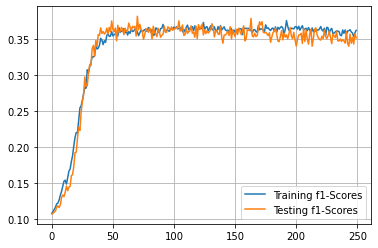

In [28]:
plt.plot(train_f1_scores, label='Training f1-Scores')
plt.plot(test_f1_scores, label='Testing f1-Scores')
plt.legend()
plt.grid()

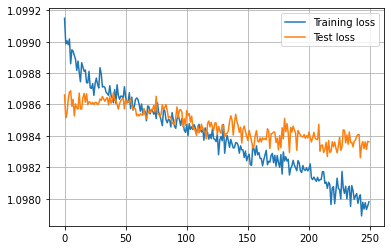

In [29]:
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Test loss')
plt.legend()
plt.grid()

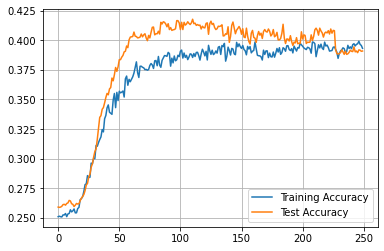

In [30]:
plt.plot(accuracy_total_train, label='Training Accuracy')
plt.plot(accuracy_total_val, label='Test Accuracy')
plt.legend()
plt.grid()

In [31]:
#saving the model

MODEL_PATH = 'teammodel2D.pth'
torch.save(model, MODEL_PATH)

In [32]:
model = torch.load(MODEL_PATH)

In [34]:
#Evaluation
classes = ['Loss','Draw','Win']
predict_list = []
y_pred = model(Team_Test)

for i, p in enumerate(y_pred):
    y_pred = torch.max(p.data, 0)[1]
    predict_list.append(y_pred)
stacked_tensor = torch.stack(predict_list)
y_test = y_test.cpu()

print(classification_report(y_test, stacked_tensor, target_names=classes))

              precision    recall  f1-score   support

        Loss       0.29      0.37      0.32      1189
        Draw       0.21      0.04      0.06      1102
         Win       0.46      0.60      0.52      1959

    accuracy                           0.39      4250
   macro avg       0.32      0.34      0.30      4250
weighted avg       0.35      0.39      0.35      4250



Text(0.5, 15.0, 'Predicted label')

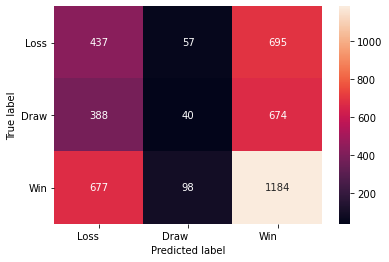

In [35]:
cm = confusion_matrix(y_test, stacked_tensor)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [36]:
correct = 0
total = 0

with torch.no_grad():
    for i, (x, y) in enumerate(test_loader):
        outputs = model(x)
        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 4250 matches: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 4250 matches: 39 %
